# L96 Basic State

In this notebook we have plotted some basic statistics of the two layer L96 system. In particular:

- Pdfs of synoptic and convective scale variables
- Time correlations of synoptic scale variables

In [4]:
import numpy as np
import numpy.random as random
import xarray as xr
import sys
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm 
from scipy.stats import gaussian_kde

In [5]:
import l96adaptive as l96
from l96adaptive import make_observations

In [33]:
directory = 'L96-Statistics-Plots' # Will save some plots here

### Getting Some Data

In [7]:
runner = l96.Integrator()
looker = l96.TrajectoryObserver(runner)

make_observations(runner, looker, 10000, 0.01)

In [8]:
data = looker.observations

### Plotting Synoptic Scale Pdfs

In [9]:
# Plotting PDF of X in a single sector

def kde_pdf(samples, title, xlabel='', save=None):
    fig, ax = plt.subplots()
    x_d = np.linspace(samples.min() - 1, samples.max() + 1, 1000) # Grid we evaluate PDF on
    kde = gaussian_kde(samples) # KDE. Using Gaussian ker
    pdf = kde.evaluate(x_d)
    ax.plot(x_d, pdf)
    ax.set_ylabel('$\\rho$')
    ax.set_xlabel(xlabel)
    #ax.plot(samples, np.full_like(samples, -0.01), 'k*', label='samples')
    #ax.legend()
    ax.grid()
    ax.set_title(title)
    if (save!=None):
        print(f'Saving plot at {save}')
        fig.savefig(save, dpi=1200)
    fig.show()

In [10]:
indices = random.choice(data.X.K.values, size = (10), replace = False)
Xs = [data.X.sel(K = i) for i in indices]

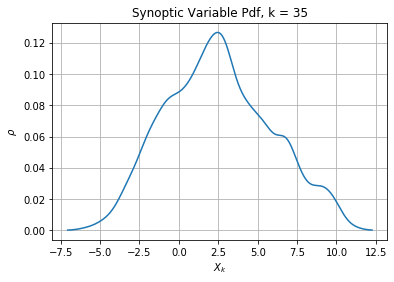

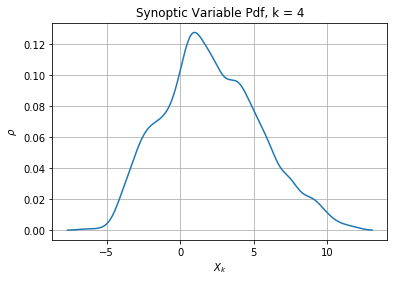

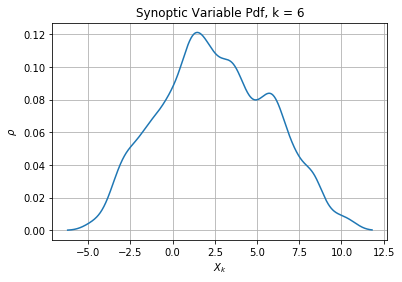

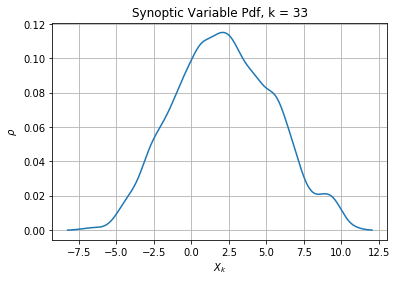

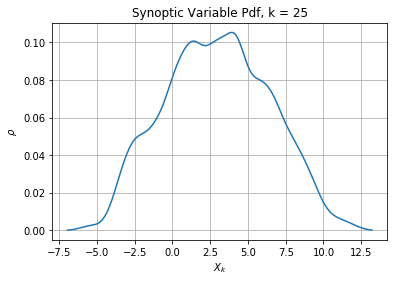

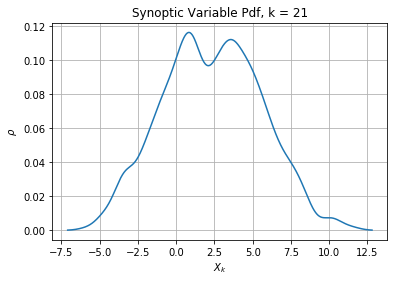

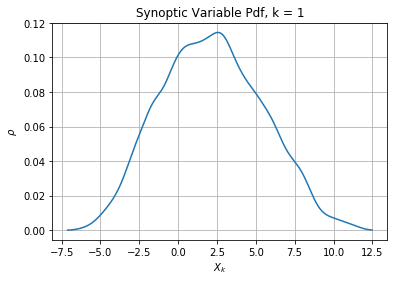

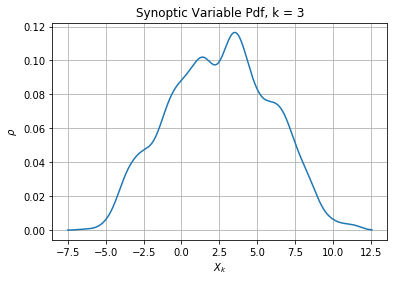

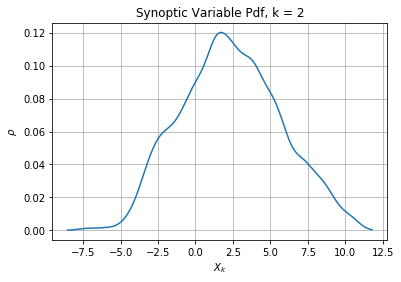

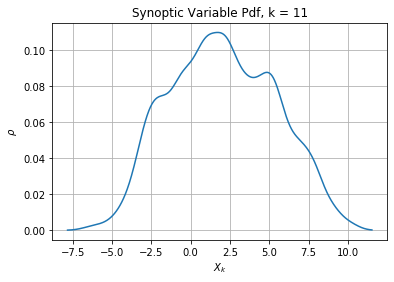

In [11]:
for X in Xs:
    index = X.K.item()
    title = f'Synoptic Variable Pdf, k = {index}'
    kde_pdf(X.values, title, xlabel = '$X_k$')

Saving plot at L96-Statistics-Plots/Synoptic-Scale-PDF.png


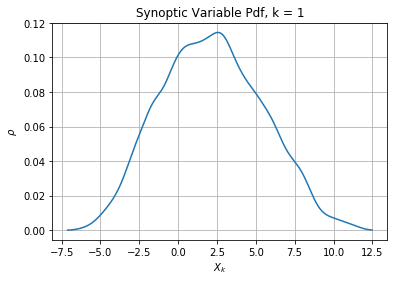

In [34]:
# Saving a Figure
X = Xs[0]
index = X.K.item()
title = f'Synoptic Variable Pdf, k = {index}'
kde_pdf(X.values, title, xlabel = '$X_k$', save = directory + '/Synoptic-Scale-PDF.png')

### Plotting Convective Scale Pdfs

In [12]:
indices = random.choice(data.Y.KJ.values, size = (10), replace = False)
Ys = [data.Y.sel(KJ = i) for i in indices]

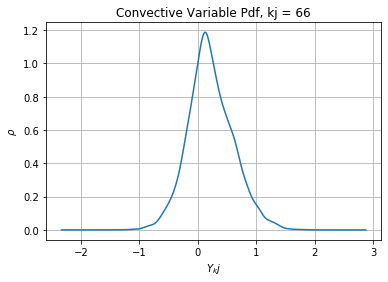

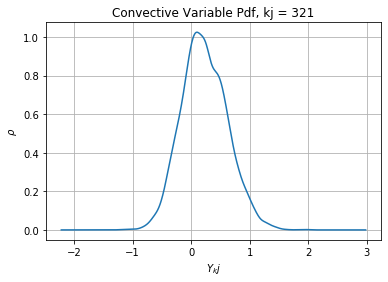

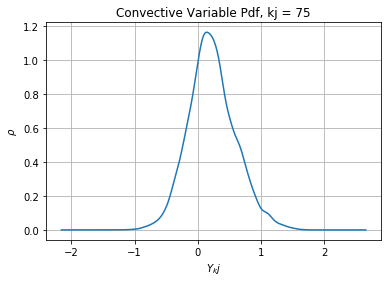

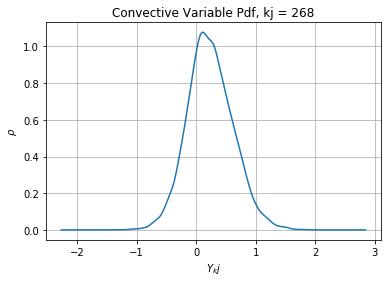

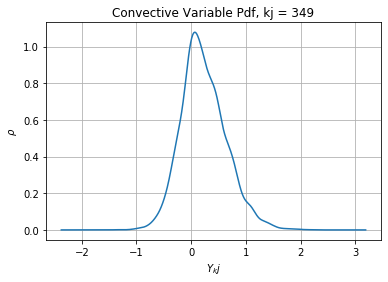

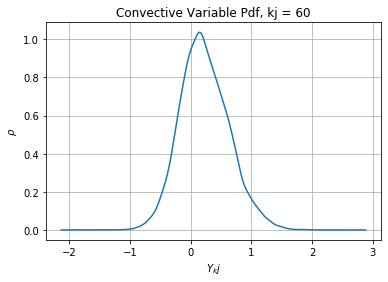

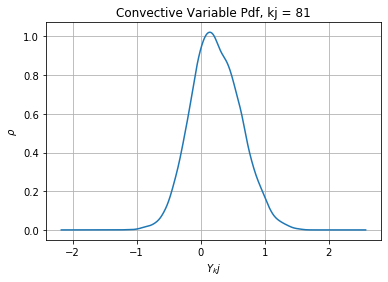

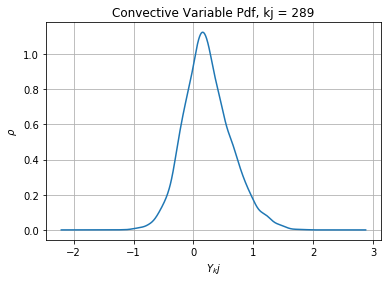

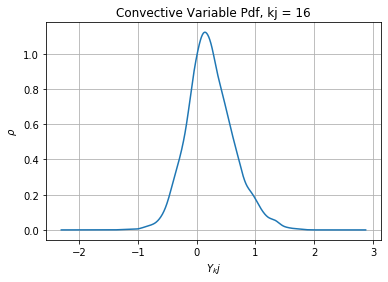

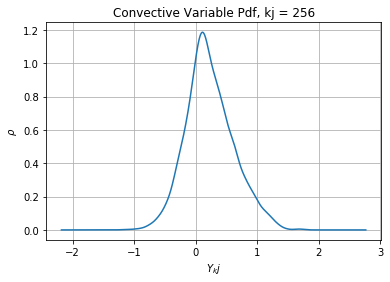

In [13]:
for Y in Ys:
    index = Y.KJ.item()
    title = f'Convective Variable Pdf, kj = {index}'
    kde_pdf(Y.values, title, xlabel = '$Y_kj$')

In [ ]:
# Saving a Figure
Y = Ys[0]
index = Y.KJ.item()
title = f'Convective Variable Pdf, kj = {index}'
kde_pdf(X.values, title, xlabel = '$X_k$', save = directory + '/Synoptic-Scale-PDF.png')

### Time Autocorrelations

In [27]:
dt = 0.01 # Time between observations

In [28]:
# Function to calculated integrated autocorrelations

def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

def autocorr_series(time_series, lags):
    """
    Returns list of autocorrelation for a list of lags
    """
    autocorrs = [np.corrcoef(time_series)]
    for lag in lags:
            ac = autocorr(time_series, lag)[1,0]
            autocorrs.append(ac)
    return autocorrs

def integrated_autocorr(time_series, lags, dx):
    """
    Returns integrated autocorrelation. x-axis of integration is lag series.
    """
    auto_correlations = autocorr_series(time_series, lags)
    return np.trapz(auto_correlations, dx=dx)

In [29]:
# Calculating Autocorrelation function
lags = np.arange(1, int(3/dt))
correlations = [autocorr_series(X.values, lags) for X in Xs]

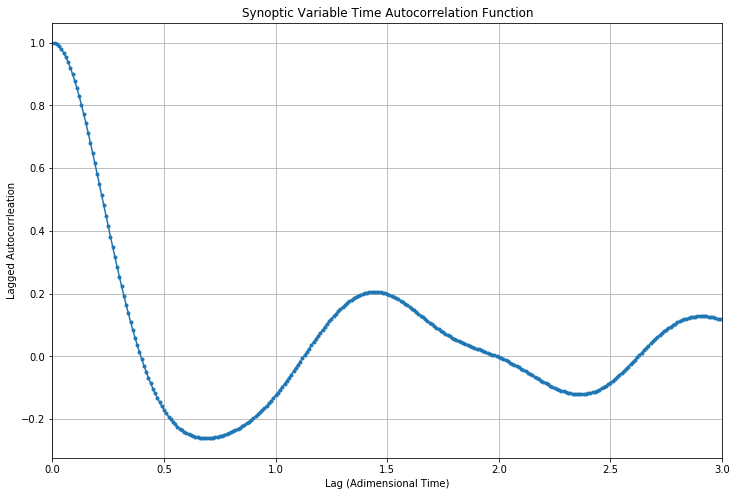

In [31]:
# Plotting Autocorrelation Functions

fig, ax = plt.subplots(figsize = (12, 8))
dt = 0.01

time_points = dt * np.hstack((0, lags))
ax.plot(time_points, correlations[0], '.-')
ax.set_ylabel('Lagged Autocorrleation')
ax.set_xlabel('Lag (Adimensional Time)')
ax.set_title(f'Synoptic Variable Time Autocorrelation Function')
ax.set_xlim((0, 3))
ax.grid()

#fig.savefig(directory + '/Synoptic-Time-Correlations.png', dpi=1200)
#fig.show()